In [80]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
def sigmoid(z):
    """
    Sigmoid function

    Parameters
    ----------
    z: (ndarray (m,)) or (scalar)
        m is the number of samples

    Returns
    -------
    (ndarray (m,)) or (scalar)
    """

    return 1 / (1 + np.exp(-z))


def f_wb(x, w, b):
    """
    Logistic regression model

    Parameters
    ----------
    x: (ndarray (m)) or (scalar)
        m is the number of samples
    w: (scalar)
    b: (scalar)

    Returns
    -------
    (ndarray (m,)) or (scalar)
    """

    return sigmoid(w * x + b)

In [82]:
def compute_cost(x, y, w, b):
    """
    Compute cost

    Parameters
    ----------
    x: (ndarray (m, n))
        m is the number of samples
    y: (ndarray (m,))
    w: (scalar)
    b: (scalar)

    Returns
    -------
    (scalar)
    """

    m = x.shape[0]
    y_hat = f_wb(x, w, b)
    cost = 1 / m * np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    return cost

In [83]:
def compute_gradient(x, y, w, b):
    """
    Compute the gradient for logistic regression

    Parameters
    ----------
    x: (ndarray (m,))
        m is the number of samples
    y: (ndarray (m,))
    w: (scalar)
    b: (scalar)

    Returns
    -------
    dj_dw: (scalar)
    dj_db: (scalar)
    """

    m = x.shape[0]
    dj_dw = 1 / m * np.sum((f_wb(x, w, b) - y) * x)
    dj_db = 1 / m * np.sum(f_wb(x, w, b) - y)
    return dj_dw, dj_db

In [84]:
def perform_gradient_descent(x, y, w_init, b_init, alpha, epochs):
    """
    Perform gradient descent

    Parameters
    ----------
    x: (ndarray (m))
        m is the number of samples
    y: (ndarray (m,))
    w_init: (scalar)
    b_init: (scalar)
    alpha: (float)
    epochs: (int)

    Returns
    -------
    w: (scalar)
    b: (scalar)
    """

    w = w_init
    b = b_init
    for i in range(epochs):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % 1000 == 0:
            print(f'Epoch {i + 1:4}, Cost: {float(compute_cost(x, y, w, b)):8.2f}')
    return w, b

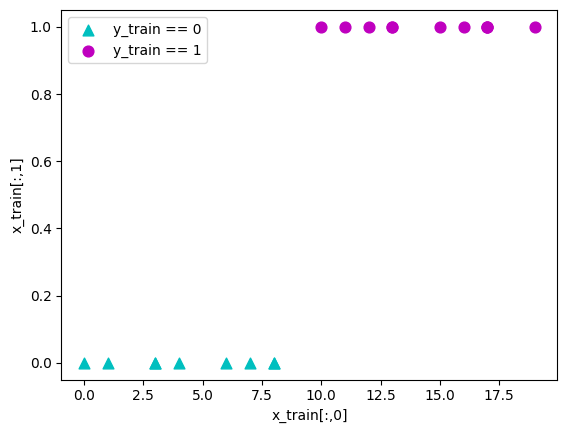

In [85]:
x_train = np.array([1, 0, 17, 8, 13, 19, 15, 10, 8, 7, 3, 6, 17, 3, 4, 17, 11, 12, 16, 13])
y_train = np.int_(x_train[:] >= 10)

plt.scatter(x_train[y_train == 0], y_train[y_train == 0], 60, marker='^', c='c', label='y_train == 0')
plt.scatter(x_train[y_train == 1], y_train[y_train == 1], 60, marker='o', c='m', label='y_train == 1')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')
plt.legend()

In [86]:
w, b = perform_gradient_descent(x_train, y_train, 0, 0, 0.01, 10000)
w, b

Epoch    1, Cost:     0.62
Epoch 1001, Cost:     0.34
Epoch 2001, Cost:     0.26
Epoch 3001, Cost:     0.22
Epoch 4001, Cost:     0.19
Epoch 5001, Cost:     0.17
Epoch 6001, Cost:     0.16
Epoch 7001, Cost:     0.15
Epoch 8001, Cost:     0.14
Epoch 9001, Cost:     0.13


(np.float64(0.6199251592044446), np.float64(-5.42258186823073))

In [87]:
prediction = f_wb(x_train, w, b)
y_hat = np.int_(prediction > 0.5)
(y_train, prediction, y_hat)

(array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]),
 array([0.00814109, 0.00439632, 0.99403667, 0.38623157, 0.93317062,
        0.9982667 , 0.97969344, 0.68496192, 0.38623157, 0.25291873,
        0.02757706, 0.15406982, 0.99403667, 0.02757706, 0.05007404,
        0.99403667, 0.80164299, 0.88252069, 0.98897191, 0.93317062]),
 array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]))

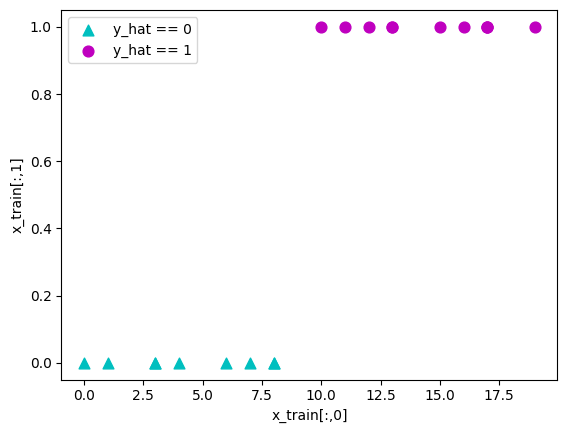

In [88]:
plt.scatter(x_train[y_hat == 0], y_train[y_hat == 0], 60, marker='^', c='c', label='y_hat == 0')
plt.scatter(x_train[y_hat == 1], y_train[y_hat == 1], 60, marker='o', c='m', label='y_hat == 1')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')
plt.legend()